In [14]:
import import_ipynb
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from image_processing_functions import read_image, canny_edge_response, \
    automatic_canny_edge_response, harris_corner_response, hough_line_detect_response, \
    hough_line_intersections, houghp_line_detect_response, houghp_line_points


In [15]:
filename = 'C:/Users/liviu/Documents/FII Master II/Proiect disertatie/datasets/dataset 1/data/0.jpg'

# Hierarchical clusterization of obtained data from Hough transform - clustering the obtained lines or their intersections?

{'used_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  

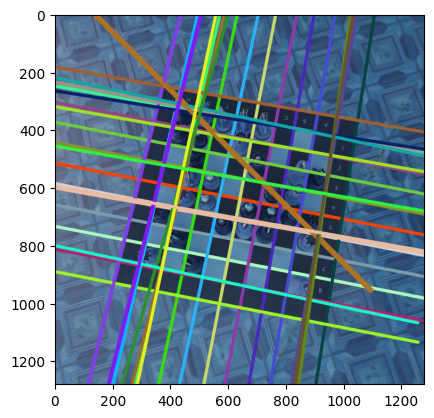

In [16]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist, squareform


# hierarchical clustering of lines using the distance between them
# followed by the augmentation of the lines to form a single one

def line_distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))


def cluster_lines(lines):
    distances = pdist(lines['coords'], metric=line_distance)
    links = linkage(distances, method='single')
    cluster_ids = fcluster(links, 15, criterion='distance')
    n_clusters = np.unique(cluster_ids)

    image_copy = np.copy(lines['used_img'])
    # image_copy = cv.cvtColor(image_copy, cv.COLOR_BGR2RGB)
    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in
                      n_clusters}
    for line, cluster_id in zip(lines['coords'], cluster_ids):
        cv.line(image_copy, (round(line[0]), round(line[1])), (round(line[2]), round(line[3])), cluster_colors[cluster_id], 10)

    plt.imshow(image_copy)

    cluster_dict = {key: [] for key in n_clusters}
    for i in range(len(cluster_ids)):
        cluster_dict[cluster_ids[i]].append(lines['coords'][i])

    clusters_found = {
        'used_img': lines['used_img'],
        'new_img': image_copy,
        'dict': cluster_dict
    }

    return clusters_found

canny_edges = canny_edge_response(read_image(filename), low_thr=10, high_thr=200)
lines = hough_line_detect_response(canny_edges)
cluster_lines(lines)

## Calculating the mean of these lines in order to obtain a single one

{'used_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  

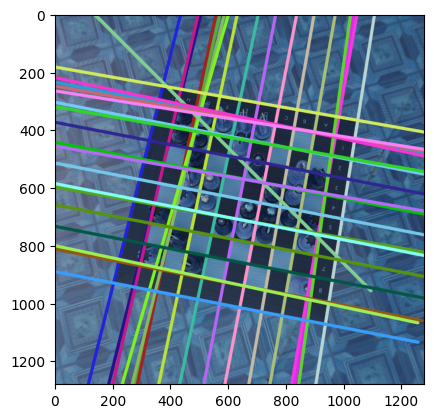

In [17]:
def augment_cluster_lines(cluster_dict):
    augmented_cluster = {key: (np.mean(np.array(values)[:, 0]), np.mean(np.array(values)[:, 1]), np.mean(np.array(values)[:, 2]), np.mean(np.array(values)[:, 3])) for key, values in cluster_dict['dict'].items() if values != []}

    image_copy = np.copy(cluster_dict['used_img'])
    cluster_colors = {i + 1: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in range(len(augmented_cluster))}
    for cluster_id, cluster_line in augmented_cluster.items():
        cv.line(image_copy, (round(cluster_line[0]), round(cluster_line[1])), (round(cluster_line[2]), round(cluster_line[3])), cluster_colors[cluster_id], 10)

    plt.imshow(image_copy)

    clusters_found = {
        'used_img': cluster_dict['used_img'],
        'img': image_copy,
        'dict': augmented_cluster
    }

    return clusters_found

clusters = cluster_lines(lines)
augment_cluster_lines(clusters)

# Hierarchical clusterization of line intersections

{'used_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  

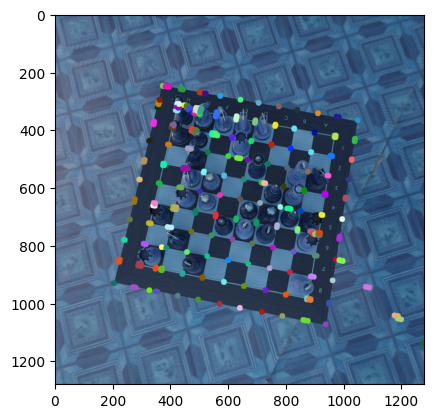

In [18]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist


def cluster_points(points):
    distances = pdist(points['list'], metric='euclidean')
    links = linkage(distances, method='ward')
    clusters = fcluster(links, 15, criterion='distance')
    unique_clusters = np.unique(clusters)

    image_copy = np.copy(points['used_img'])
    # image_copy = cv.cvtColor(image_copy, cv.COLOR_BGR2RGB)
    cluster_colors = {i: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in unique_clusters}
    for point, cluster_id in zip(points['list'], clusters):
        cv.circle(image_copy, (round(point[0]), round(point[1])), 10, cluster_colors[cluster_id], -1)

    plt.imshow(image_copy)

    cluster_dict = {key: [] for key in unique_clusters}
    for i in range(len(clusters)):
        cluster_dict[clusters[i]].append(points['list'][i])

    clusters_found = {
        'used_img': points['used_img'],
        'new_img': image_copy,
        'dict': cluster_dict
    }

    return clusters_found

lines = hough_line_detect_response(canny_edges, threshold=120)
inters = hough_line_intersections(lines)
cluster_points(inters)

## Transforming the clusters of points into a single one

{'used_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  

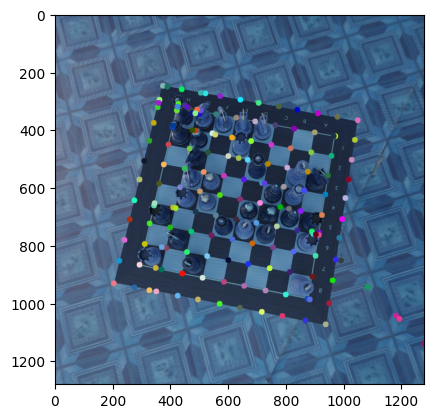

In [19]:
def augment_cluster_points(cluster_dict):
    augmented_cluster = {key: (np.mean(np.array(values)[:, 0]), np.mean(np.array(values)[:, 1])) for key, values in cluster_dict['dict'].items() if values != []}

    image_copy = np.copy(cluster_dict['used_img'])
    cluster_colors = {i + 1: (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)) for i in range(len(augmented_cluster))}
    for cluster_id, cluster_point in augmented_cluster.items():
        cv.circle(image_copy, (round(cluster_point[0]), round(cluster_point[1])), 10, cluster_colors[cluster_id], -1)

    plt.imshow(image_copy)

    clusters_found = {
        'used_img': cluster_dict['used_img'],
        'img': image_copy,
        'dict': augmented_cluster
    }

    return clusters_found

clusters = cluster_points(inters)
augment_cluster_points(clusters)

# Hierarchical clustering of lines obtained from HoughLinesP()

{'used_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  

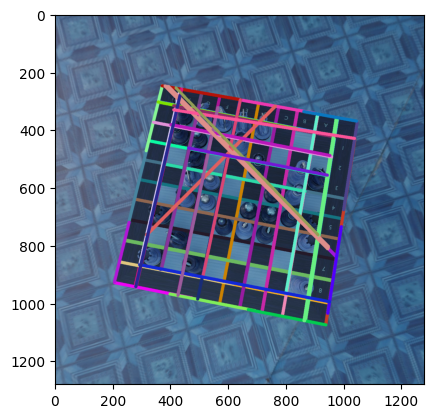

In [20]:
def houghp_cluster_lines(lines):
    lines['coords'] = lines['list']
    return cluster_lines(lines)

houghp_lines = houghp_line_detect_response(canny_edges, threshold=90, minLineLength=100, maxLineGap=150)
houghp_cluster_lines(houghp_lines)

{'used_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  

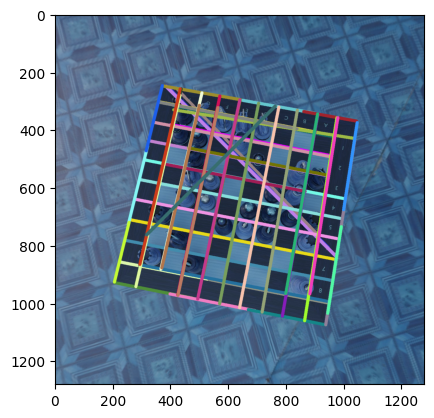

In [21]:
houghp_clusters = houghp_cluster_lines(houghp_lines)
augment_cluster_lines(houghp_clusters)

# Hierarchical clustering of the points that mark as coordinates of the lines from HoughLinesP()

{'used_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  

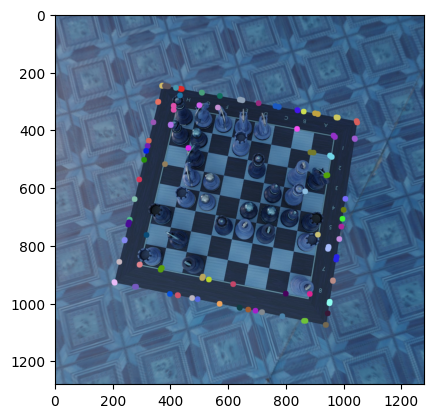

In [22]:
def houghp_cluster_points(points):
    return cluster_points(points)

point_list = houghp_line_points(houghp_lines)
houghp_cluster_points(point_list)

{'used_img': array([[[102, 133, 166],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[101, 132, 165],
         [101, 132, 165],
         [ 99, 132, 165],
         ...,
         [ 46,  80, 116],
         [ 43,  79, 115],
         [ 43,  79, 115]],
 
        [[100, 131, 164],
         [100, 131, 164],
         [ 97, 130, 163],
         ...,
         [ 46,  80, 116],
         [ 46,  80, 116],
         [ 45,  79, 115]],
 
        ...,
 
        [[ 93, 128, 162],
         [ 93, 128, 162],
         [ 94, 129, 163],
         ...,
         [ 52,  87, 127],
         [ 57,  89, 130],
         [ 59,  91, 132]],
 
        [[ 92, 127, 161],
         [ 92, 127, 161],
         [ 93, 128, 162],
         ...,
         [ 56,  91, 131],
         [ 61,  93, 134],
         [ 63,  95, 136]],
 
        [[ 91, 126, 160],
         [ 91, 126, 160],
         [ 93, 128, 162],
         ...,
         [ 59,  

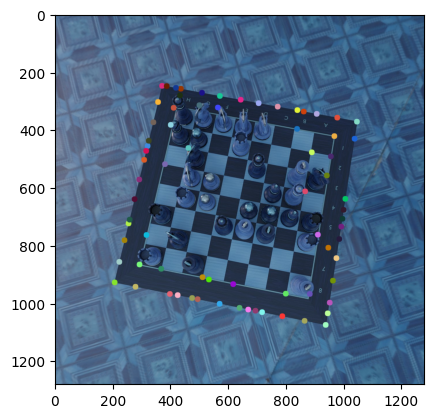

In [23]:
clusters_p = houghp_cluster_points(point_list)
augment_cluster_points(clusters_p)